# Suman Roy, MDS202041

## Question 1

Saving CinqueTerre.jpg to CinqueTerre (1).jpg


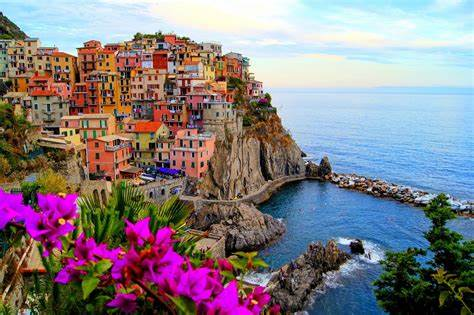

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()
img = cv.imread("/content/CinqueTerre.jpg")
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
height=img.shape[0]
width= img.shape[1]
channel=img.shape[2]
print("Height of the image: ", height)
print("Width of the image : ", width)
print("Number of channels of the image : ",channel )

Height of the image:  315
Width of the image :  474
Number of channels of the image :  3


In [7]:
subimg1 = img[0:50, 0:50]
subimg2 = img[height-50:height,width-50:width]

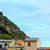

In [8]:
cv2_imshow(subimg1)
cv.waitKey(0)
cv.destroyAllWindows()

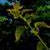

In [9]:
cv2_imshow(subimg2)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
import numpy as np
subimg1_gray = cv.cvtColor(subimg1,cv.COLOR_BGR2GRAY)
subimg2_gray = cv.cvtColor(subimg2,cv.COLOR_BGR2GRAY)
SSD= np.sum((subimg1_gray.astype('float')-subimg2_gray.astype('float'))**2)
SSD

62657575.0

## Question 2

In [19]:
from google.colab import files
uploaded = files.upload()

Saving monastery.jpg to monastery (1).jpg


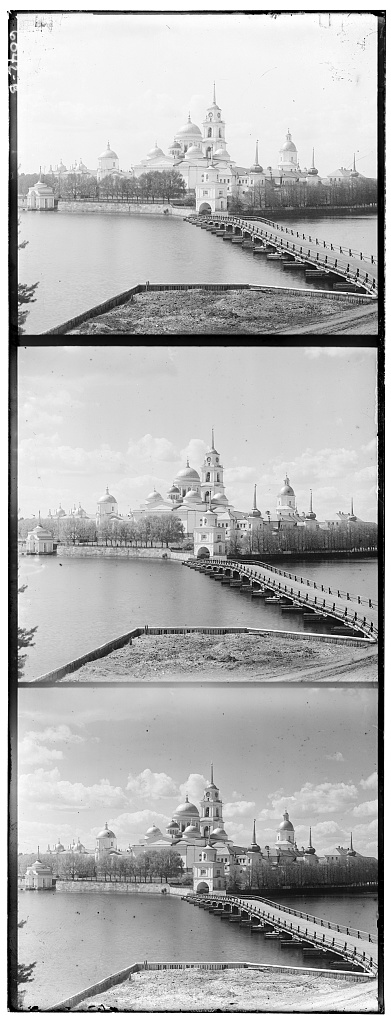

In [36]:
img = cv.imread("/content/monastery.jpg")
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

In [42]:
## cutting the image into three segments
c = np.floor(img.shape[0] / 3.0).astype(np.int)
img = img/255

B = img[0:c,:,0]
G = img[c:2*c,:,0]
R = img[2*c+1:,:,0]

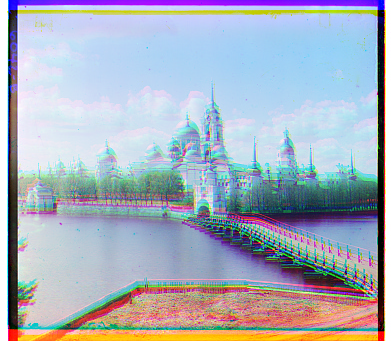

In [51]:
img2 = np.dstack([B,G,R])
cv2_imshow(img2*255)

In [56]:
def align(image1, image2, x=(-10, 10), y=(-10, 10)):
    image1_c = image1[int(0.1 * len(image1)):-int(0.1 * len(image1)),
              int(0.1 * len(image1[0])):-int(0.1 * len(image1[0]))]
    image2_c = image2[int(0.1 * len(image2)):-int(0.1 * len(image2)),
              int(0.1 * len(image2[0])):-int(0.1 * len(image2[0]))]
    best_score = -float('inf')
    best_shift = [0, 0]
    for i in range(x[0], x[1] + 1):
        for j in range(y[0], y[1] + 1):
            temp_score = score(np.roll(image1_c, (i, j), (0, 1)), image2_c)
            if temp_score > best_score:
                best_score = temp_score
                best_shift = (i, j)
    return np.roll(image1, best_shift, (0, 1)), np.array(best_shift)

def score(image1, image2):
    return -np.sum(np.sum((image1 - image2)**2))


In [57]:
G_, G_shift = align(G, B)
R_, R_shift = align(R, B)

In [58]:
G_shift,R_shift

(array([-3,  2]), array([4, 2]))

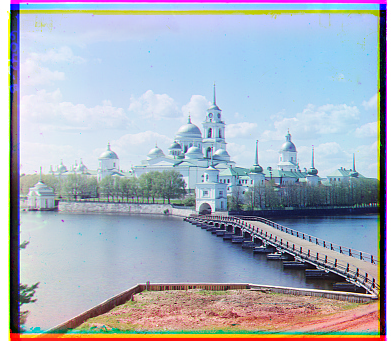

In [55]:
output = np.dstack([B,G_,R_])
output=output*255
cv2_imshow(output)

## Question 4

Two of my favourite illusions are :

1.   "THE ROTATING SNAKES ILLUSION"
2.   "THE HEALING GRID"

"THE ROTATING SNAKES ILLUSION" is a magnificent example of how we perceive illusory motion from a stationary image. The "snakes" in the pattern appear to rotate as we move our eyes around the figure. In reality, nothing is moving other than our eyes.If we hold our gaze steadily on one of the "snake" centers, the motion will slow down or even stop.Research has revealed that the jerky eye motions—such as microsaccades, larger saccades, and even blinks—that people make when looking at an image are among the key elements that produce illusions like this one.

The  "THE HEALING GRID" illusion derives, in part, from "perceptual fading," the phenomenon in which an unchanging visual image fades from view. When we stare at the center of the pattern, the grid's outer parts fade more than its center due to the comparatively lower resolution of our peripheral vision. The ensuing neural guesstimates that our brain imposes to "reconstruct" the faded outer flanks are based on the available information from the center, as well as our nervous system's intrinsic tendency to seek structure and order, even when the sensory in­put is fundamentally disorganized.
